#Carga de datos y librerias


In [1]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split

#Biblioteca de Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,model_from_json
from keras.layers import Dropout, LSTM, Dense, Activation,Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, TimeSeriesSplit
import time


In [2]:
pip install scikit-posthocs --quiet

In [3]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [4]:
cd /content/gdrive/MyDrive/Tesis/Datos-2

/content/gdrive/MyDrive/Tesis/Datos-2


#Analsisis de Error de cada modelo

In [5]:
Narmax_result_mlp=pd.read_csv('Narmax_results_MLP_CE.csv',index_col=0)
Narmax_result_gru=pd.read_csv('Narmax_results_GRU_CE.csv',index_col=0)
Narmax_result_lstm=pd.read_csv('Narmax_results_LSTM_CE2.csv',index_col=0)
Narmax_result_cnn=pd.read_csv('Narmax_results_CNN_CE.csv',index_col=0)
Narmax_result_transformer=pd.read_csv('Narmax_results_Transformer_CE.csv',index_col=0)
Narmax_result_svr=pd.read_csv('Narmax_results_SVR_CE.csv',index_col=0)
Narmax_result_elm=pd.read_csv('Narmax_results_ELM_CE.csv',index_col=0)

In [6]:
print(Narmax_result_mlp.shape)
print(Narmax_result_gru.shape)
print(Narmax_result_lstm.shape)
print(Narmax_result_cnn.shape)
print(Narmax_result_transformer.shape)
print(Narmax_result_svr.shape)
print(Narmax_result_elm.shape)

(500, 8)
(500, 8)
(500, 8)
(500, 8)
(500, 8)
(500, 8)
(500, 8)


##ELM

In [7]:
Narmax_result_elm = Narmax_result_elm.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_elm.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
334,Narmax_ELM_sigm_112.0,67,5,0.017511,0.376205,4.032922,0.613356,0.459524
139,Narmax_ELM_sigm_102.0,28,5,0.016301,0.378560,4.744431,0.615272,0.454190
19,Narmax_ELM_sigm_104.0,4,5,0.003689,0.379862,4.880875,0.616330,0.451225
144,Narmax_ELM_sigm_112.0,29,5,0.028186,0.398128,4.861078,0.630974,0.463735
214,Narmax_ELM_tanh_100.0,43,5,0.007790,0.403825,5.459772,0.635472,0.491577


##SVR

In [10]:
Narmax_result_svr = Narmax_result_svr.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_svr.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
499,Narmax_SVR_rbf_0.2770928891667469_0.1025894933...,100,5,0.051742,0.327748,2.625833,0.572493,0.408803
104,Narmax_SVR_rbf_0.3496915080713324_0.1012059609...,21,5,0.053815,0.329455,1.834261,0.573981,0.411237
129,Narmax_SVR_rbf_0.33725004803371594_0.150296624...,26,5,0.050316,0.329767,1.936130,0.574254,0.408710
384,Narmax_SVR_rbf_0.35943562993040684_0.410112170...,77,5,0.043721,0.330374,2.405198,0.574781,0.417462
159,Narmax_SVR_rbf_0.4478945971593214_0.4584764985...,32,5,0.033981,0.330394,2.630901,0.574799,0.420378


##MLP

In [11]:
Narmax_result_mlp = Narmax_result_mlp.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_mlp.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
459,MLP_CE_92_5_800_20.0_2.0_256.0_0.61_adam_4.110...,92,5,10.724492,0.346373,0.588535,0.444450,375.019867
279,MLP_CE_56_5_800_80.0_3.0_160.0_0.56_adam_1.324...,56,5,9.945225,0.351513,0.592885,0.445533,352.232330
33,MLP_CE_7_4_800_80.0_2.0_480.0_0.65_adam_2.8387...,7,4,4.404431,0.351551,0.592918,0.445643,387.411224
54,MLP_CE_11_5_800_10.0_2.0_544.0_0.48_adam_4.047...,11,5,15.854931,0.351660,0.593009,0.447140,428.875153
64,MLP_CE_13_5_800_20.0_1.0_256.0_0.49_adam_3.685...,13,5,27.562203,0.351895,0.593208,0.446939,393.507904


##GRU

In [12]:
Narmax_result_gru = Narmax_result_gru.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_gru.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
324,GRU_65_5_800_40.0_2.0_480.0_0.66_adam_0.000302...,65,5,11.981645,0.332557,0.576678,0.429404,376.327942
19,GRU_4_5_800_20.0_3.0_460.0_0.53_adam_0.0003537...,4,5,17.638860,0.333403,0.577411,0.431432,391.568390
219,GRU_44_5_800_20.0_3.0_380.0_0.58_adam_0.000308...,44,5,22.107000,0.333685,0.577655,0.431108,370.271149
359,GRU_72_5_800_20.0_2.0_560.0_0.66_adam_0.000381...,72,5,14.394235,0.336140,0.579776,0.434814,364.590485
329,GRU_66_5_800_20.0_2.0_740.0_0.62_adam_0.000392...,66,5,14.380414,0.336286,0.579902,0.434847,367.457336


##LSTM

In [13]:
Narmax_result_lstm = Narmax_result_lstm.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_lstm.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
index,,,,,,,,
84,LSTM_CE_800_80.0_3.0_380.0_0.54_adam_3.7701131...,17,5,32.117442,0.341633,0.584494,0.431411,402.878815
99,LSTM_CE_800_40.0_2.0_480.0_0.61_adam_4.3371128...,20,5,25.783906,0.343131,0.585774,0.433162,416.095551
264,LSTM_CE_800_20.0_3.0_440.0_0.56_adam_4.7310918...,53,5,37.763043,0.344236,0.586717,0.432808,410.044037
94,LSTM_CE_800_50.0_2.0_780.0_0.44_adam_2.2484452...,19,5,27.404429,0.344416,0.586869,0.435140,405.293518
4,LSTM_CE_800_50.0_1.0_680.0_0.68_adam_3.2612220...,1,5,28.802294,0.344523,0.586961,0.432817,408.976227


##CNN

In [14]:
Narmax_result_cnn= Narmax_result_cnn.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_cnn.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
154,CNN_CE_800_30.0_1.0_400.0_0.48_adam_4.14460307...,31,5,6.632970,0.348849,0.590634,0.442691,376.114136
409,CNN_CE_800_50.0_1.0_200.0_0.7_adam_2.104338934...,82,5,8.340308,0.349461,0.591152,0.440872,376.066437
244,CNN_CE_800_70.0_1.0_400.0_0.56_adam_3.97745796...,49,5,4.935565,0.350626,0.592137,0.441863,402.147308
199,CNN_CE_800_30.0_1.0_600.0_0.46_adam_1.40642368...,40,5,8.044215,0.350680,0.592182,0.443661,360.540344
424,CNN_CE_800_30.0_1.0_600.0_0.53_adam_2.73074468...,85,5,6.985213,0.351569,0.592932,0.441787,352.450165


##Transformer

In [15]:
Narmax_result_transformer= Narmax_result_transformer.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_transformer.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
index,,,,,,,,
159,Transformer_CE_32_5_800_90.0_128.0_5.0_0.42_19...,32,5,21.404986,0.336877,0.580411,0.418683,401.642548
164,Transformer_CE_33_5_800_100.0_128.0_7.0_0.44_1...,33,5,19.589863,0.343960,0.586481,0.428965,380.546997
344,Transformer_CE_69_5_800_40.0_96.0_6.0_0.61_224...,69,5,57.999296,0.346943,0.589019,0.433090,468.981171
249,Transformer_CE_50_5_800_20.0_64.0_7.0_0.62_224...,50,5,64.240140,0.348265,0.590139,0.435506,374.909058
389,Transformer_CE_78_5_800_30.0_160.0_8.0_0.63_16...,78,5,73.150056,0.350094,0.591688,0.434001,436.018036


#Se verifica normalidad de los errores de test

In [16]:
from scipy.stats import shapiro
import numpy as np
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi
import scikit_posthocs as sp

In [20]:
def test_shapiro(data):
  stat, p = shapiro(data)
  print('stat=%.3f, p=%.5f' % (stat, p))
  if p > 0.05:
    print('Probably Gaussian')
    print("")
  else:
    print('Probably not Gaussian')
    print("")

In [21]:
print("Test de shapiro a Resutl MLP")
test_shapiro(Narmax_result_svr["MSE"])

print("Test de shapiro a Resutl ELM")
test_shapiro(Narmax_result_elm["MSE"])

print("Test de shapiro a Resutl SVR")
test_shapiro(Narmax_result_svr["MSE"])

print("Test de shapiro a Resutl GRU")
test_shapiro(Narmax_result_gru["MSE"])

print("Test de shapiro a Resutl LSTM")
test_shapiro(Narmax_result_lstm["MSE"])

print("Test de shapiro a Resutl CNN")
test_shapiro(Narmax_result_cnn["MSE"])

print("Test de shapiro a Resutl transformer")
test_shapiro(Narmax_result_transformer["MSE"])

Test de shapiro a Resutl MLP
stat=0.242, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl ELM
stat=0.023, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl SVR
stat=0.242, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl GRU
stat=0.884, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl LSTM
stat=0.946, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl CNN
stat=0.906, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl transformer
stat=0.775, p=0.00000
Probably not Gaussian



In [22]:
def grafico_distribucion(data):
  plt.subplots(figsize=(7,3))
  sns.histplot(x=data,kde=True,color="blue",bins=30)
  plt.tight_layout()
  plt.show()

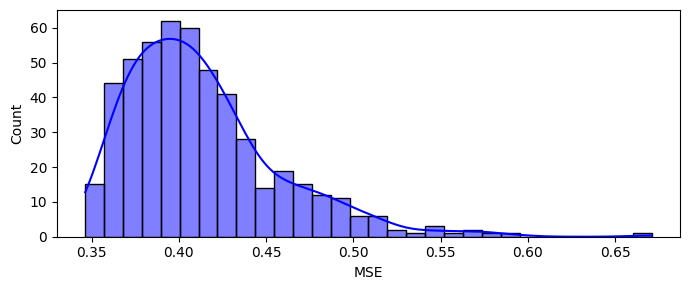

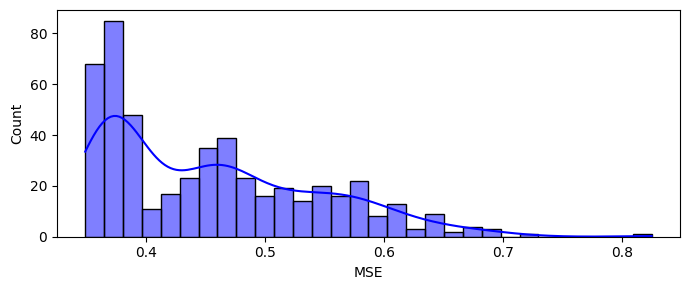

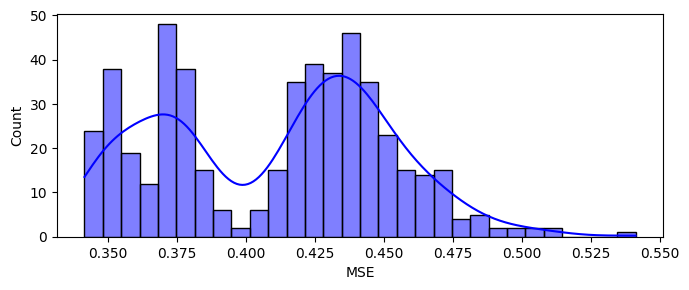

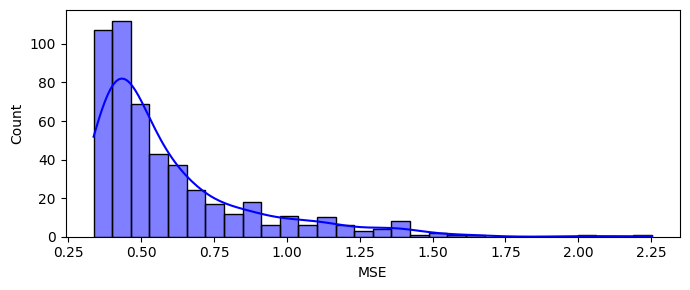

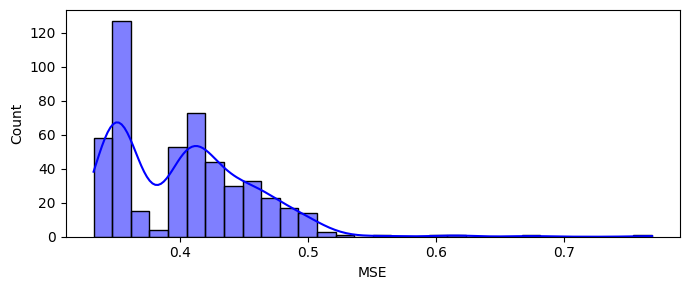

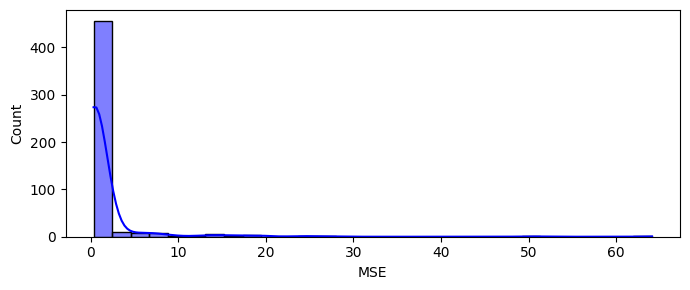

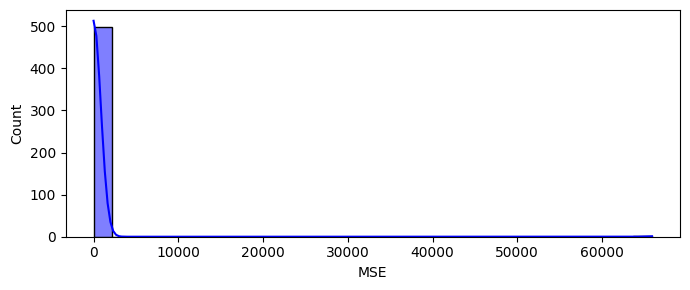

In [23]:
grafico_distribucion(Narmax_result_mlp["MSE"])
grafico_distribucion(Narmax_result_cnn["MSE"])
grafico_distribucion(Narmax_result_lstm["MSE"])
grafico_distribucion(Narmax_result_transformer["MSE"])
grafico_distribucion(Narmax_result_gru["MSE"])
grafico_distribucion(Narmax_result_svr["MSE"])
grafico_distribucion(Narmax_result_elm["MSE"])

## Test de Friedman


In [24]:
# Convertir los datos en un array 2D
data = np.array([Narmax_result_lstm["MSE"],Narmax_result_svr["MSE"],Narmax_result_elm["MSE"], Narmax_result_cnn["MSE"],Narmax_result_gru["MSE"],Narmax_result_mlp["MSE"],Narmax_result_transformer["MSE"]])
#data = np.array([result_lstm["MSE"], result_cnn["MSE"],result_gru["MSE"],result_mlp["MSE"],result_transformer["MSE"]])

# Realizar el test de Friedman
statistic, p_value = friedmanchisquare(*data)
print('stat=%.3f, p=%.3f' % (statistic, p_value))
nivel_significancia = 0.05
# Verificar si se rechaza o no la hipótesis nula
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")

stat=2313.164, p=0.000
Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


kruskal

In [26]:
from scipy.stats import kruskal
# Convertir los datos en un array 2D
data = np.array([Narmax_result_lstm["MSE"],Narmax_result_svr["MSE"],Narmax_result_elm["MSE"], Narmax_result_cnn["MSE"],Narmax_result_gru["MSE"],Narmax_result_mlp["MSE"],Narmax_result_transformer["MSE"]])

# Realizar el test de Friedman
statistic, p_value = kruskal(*data)
print('stat=%.3f, p=%.3f' % (statistic, p_value))
nivel_significancia = 0.05
# Verificar si se rechaza o no la hipótesis nula
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")

stat=1181.325, p=0.000
Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


## post-hoc 1

In [27]:
# Combinar los datos en un DataFrame
data_mse = pd.DataFrame({'LSTM':Narmax_result_lstm["MSE"],"SRV":Narmax_result_svr["MSE"], "ELM":Narmax_result_elm["MSE"], 'CNN':Narmax_result_cnn["MSE"], 'MLP': Narmax_result_mlp["MSE"],'GRU': Narmax_result_gru["MSE"],'Transformer':Narmax_result_transformer["MSE"]})
data_time = pd.DataFrame({'LSTM':Narmax_result_lstm["time"],"SRV":Narmax_result_svr["time"], "ELM":Narmax_result_elm["time"], 'CNN':Narmax_result_cnn["time"], 'MLP': Narmax_result_mlp["time"],'GRU': Narmax_result_gru["time"],'Transformer':Narmax_result_transformer["time"]})

In [ ]:
sp.posthoc_nemenyi_friedman(data_mse.T.T)

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
LSTM,1.000000,0.001000,0.001,0.001000,0.695698,0.001,0.001
SRV,0.001000,1.000000,0.001,0.006183,0.013426,0.001,0.001
ELM,0.001000,0.001000,1.000,0.001000,0.001000,0.001,0.001
CNN,0.001000,0.006183,0.001,1.000000,0.001000,0.001,0.001
MLP,0.695698,0.013426,0.001,0.001000,1.000000,0.001,0.001
GRU,0.001000,0.001000,0.001,0.001000,0.001000,1.000,0.001
Transformer,0.001000,0.001000,0.001,0.001000,0.001000,0.001,1.000


kruskal

In [30]:
from scipy.stats import kruskal
# Convertir los datos en un array 2D
data = np.array([Narmax_result_lstm["MSE"],Narmax_result_svr["MSE"],Narmax_result_elm["MSE"], Narmax_result_cnn["MSE"],Narmax_result_gru["MSE"],Narmax_result_mlp["MSE"],Narmax_result_transformer["MSE"]])

# Realizar el test de Friedman
statistic, p_value = kruskal(*data)
print('stat=%.3f, p=%.3f' % (statistic, p_value))
nivel_significancia = 0.05
# Verificar si se rechaza o no la hipótesis nula
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")

stat=1181.325, p=0.000
Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


In [29]:
posthoc_df = sp.posthoc_mannwhitney([Narmax_result_lstm["MSE"],Narmax_result_svr["MSE"],Narmax_result_elm["MSE"],Narmax_result_cnn["MSE"],Narmax_result_mlp["MSE"],Narmax_result_gru["MSE"],Narmax_result_transformer["MSE"]], p_adjust = 'bonferroni')
group_names= ["LSTM", "SRV","ELM","CNN","MLP","GRU","Transformer"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
LSTM,1.000000,0.000001,0.000000,0.000000,1.000000,0.000195,0.000000
SRV,0.000001,1.000000,0.000000,1.000000,0.000017,0.000000,0.000000
ELM,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
CNN,0.000000,1.000000,0.000000,1.000000,0.000002,0.000000,0.000000
MLP,1.000000,0.000017,0.000000,0.000002,1.000000,0.000687,0.000000
GRU,0.000195,0.000000,0.000000,0.000000,0.000687,1.000000,0.000000
Transformer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
data_mse.describe()

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.410421,1.500085,140.337319,0.454680,0.413393,0.403091,0.596325
std,0.040876,4.830765,2947.977100,0.088624,0.044281,0.054056,0.277780
min,0.341633,0.327748,0.376205,0.348849,0.346373,0.332557,0.336877
25%,0.373270,0.377079,0.596043,0.376272,0.381056,0.353103,0.408633
50%,0.420696,0.431113,1.003159,0.442755,0.405044,0.403893,0.486615
75%,0.440413,0.521643,2.624980,0.515865,0.431644,0.434971,0.675382
max,0.541191,64.090694,65904.015678,0.824900,0.670968,0.769103,2.253026


In [ ]:
data_time.describe()

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.185629,0.028662,0.028833,8.708942,14.536189,11.380904,41.328243
std,17.008560,0.026733,0.037079,3.906632,8.385127,6.392214,25.775623
min,8.428803,0.003441,0.001189,3.281283,4.103793,4.353751,7.471298
25%,18.757722,0.009215,0.007822,5.863557,8.423541,7.472782,23.226936
50%,29.586760,0.019933,0.015359,7.826615,12.146727,9.880896,35.415471
75%,44.527625,0.040652,0.029698,10.896955,18.127097,12.939616,52.381341
max,94.304532,0.181182,0.232362,23.709539,51.804508,64.037839,207.977820


# Sección nueva

In [31]:
result_mlp=pd.read_csv('results_MLP_CE.csv',index_col=0)
result_gru=pd.read_csv('results_GRU_CE.csv',index_col=0)
result_lstm=pd.read_csv('results_LSTM_CE.csv',index_col=0)
result_cnn=pd.read_csv('results_CNN_CE.csv',index_col=0)
result_transformer=pd.read_csv('results_Transformer_CE.csv',index_col=0)
result_svr=pd.read_csv('results_SVR_CE.csv',index_col=0)
result_elm=pd.read_csv('results_ELM_CE.csv',index_col=0)

In [ ]:
pip install scipy --quiet

In [34]:
from scipy.stats import ranksums,mannwhitneyu

CNN

In [32]:
data_cnn_mse= np.array(result_cnn["MSE"])
data_cnn_mse_narmax= np.array(Narmax_result_cnn["MSE"])

In [35]:
statistic, p_value = mannwhitneyu(data_cnn_mse,data_cnn_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.


GRU

In [37]:
data_gru_mse= np.array(result_gru["MSE"])
data_gru_mse_narmax= np.array(Narmax_result_gru["MSE"])

In [38]:
statistic, p_value = mannwhitneyu(data_gru_mse,data_gru_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


Transfomer

In [39]:
data_transformer_mse= np.array(result_transformer["MSE"])
data_transformer_mse_narmax= np.array(Narmax_result_transformer["MSE"])

In [40]:
statistic, p_value = mannwhitneyu(data_transformer_mse,data_transformer_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


MLP

In [41]:
data_mlp_mse= np.array(result_mlp["MSE"])
data_mlp_mse_narmax= np.array(Narmax_result_mlp["MSE"])

In [42]:
statistic, p_value = mannwhitneyu(data_mlp_mse,data_mlp_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


SVR

In [43]:
data_svr_mse= np.array(result_svr["MSE"])
data_svr_mse_narmax= np.array(Narmax_result_svr["MSE"])

In [44]:
statistic, p_value = mannwhitneyu(data_svr_mse,data_svr_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


LSTM

In [45]:
data_lstm_mse= np.array(result_lstm["MSE"])
data_lstm_mse_narmax= np.array(Narmax_result_lstm["MSE"])

In [46]:
statistic, p_value = mannwhitneyu(data_lstm_mse,data_lstm_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


ELM

In [47]:
data_elm_mse= np.array(result_elm["MSE"])
data_elm_mse_narmax= np.array(Narmax_result_elm["MSE"])

In [48]:
statistic, p_value = mannwhitneyu(data_elm_mse,data_elm_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.
